# 04. Estimating Proportions
## Euro Problem
When spun on edge 250 times, a Belgian one-euro coin came up heads 140 times and tails
110. “It looks very suspicious to me,” said Barry Blight, a statistics lecturer at the London
School of Economics. “If the coin were unbiased, the chance of getting a result as extreme
as that would be less than 7%.”
But do these data give evidence that the coin is biased rather than fair?

In [23]:
from scipy.stats import binom
import numpy as np
from empiricaldist import Pmf
from matplotlib import pyplot as plt
# for a single k
# binom.pmf(k,n,p)
n = 5
p = 0.5
# for multiple ks
ks = np.arange(n+1)
ps = binom.pmf(ks,n,p)

In [5]:
def make_binomial(n,p):
    ks = np.arange(n+1)
    ps = binom.pmf(ks,n,p)
    return Pmf(ps,ks)

In [6]:
pmf_k = make_binomial(250,1/2)

<AxesSubplot:>

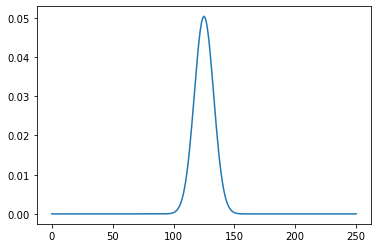

In [7]:
pmf_k.plot()

In [9]:
pmf_k.prob_le(110) + pmf_k.prob_ge(140)

0.06642115124004327

## Bayesian Estimation
- Start with a prior, here we chose *uniform* prior. But for other cases, different priors maybe suitable.


In [11]:
hypos = np.linspace(0,1,101)
prior = Pmf(1,hypos)
prior.normalize()

101

In [12]:
likelihood_heads = hypos
likelihood_tails = 1-hypos
likelihood = {
    'H': likelihood_heads,
    'T': likelihood_tails
}

In [13]:
# create a dataset (the observations)
dataset = 'H' * 140 + 'T' * 110

In [14]:
def update_euro(pmf,dataset):
    for data in dataset:
        pmf *= likelihood[data]
    pmf.normalize()

<AxesSubplot:>

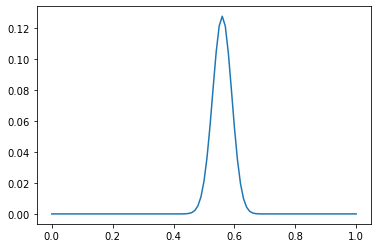

In [17]:
posterior = prior.copy()
update_euro(posterior,dataset)
posterior.plot()

In [18]:
posterior.max_prob()

0.56

## Triangle Prior
A uniform prior is not the best choice. The prior may deviate from 0.5, but it is highly unlikely that we will see values of 0.1 or 0.9, even for a biased coin. It's better choose a prior with higher values around 0.5.

One simple solution is a **Triangle shaped** prior.

In [19]:
ramp_up = np.arange(50)
ramp_down = np.arange(50,-1,-1)
triangle = Pmf(np.append(ramp_up,ramp_down),hypos,name='Triangle')
triangle.normalize()

2500

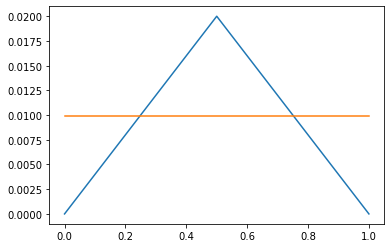

In [28]:
plt.plot(triangle)
plt.plot(prior)

In [29]:
# compare both
post_tri = triangle.copy()
post_uni = prior.copy()
update_euro(post_tri,dataset)
update_euro(post_uni,dataset)

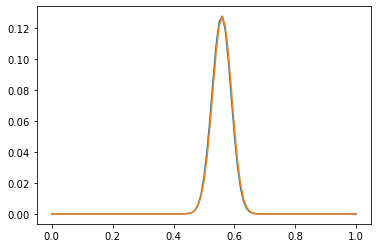

In [31]:
plt.plot(post_tri)
plt.plot(post_uni)

There is no visible difference => **The choice of priors** is not that important.

**Swamping the priors**: with enough data, different prios converege to the same posterior

## Binomial Likelihood Function
Since the coin is a True/False Choice, we can use the binomial pmf to compute the posterior faster

In [44]:
def update_binom(pmf,data):
    k,n = data
    xs = pmf.qs
    likelihood = binom.pmf(k,n,xs)
    pmf *= likelihood
    pmf.normalize()

<AxesSubplot:>

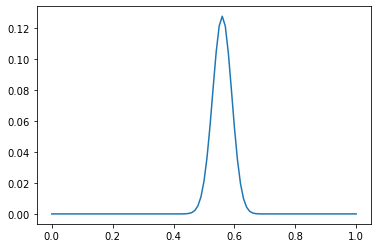

In [46]:
uniform2 = Pmf(1,hypos,name="uniform2")
data = 140, 250
update_binom(uniform2,data)
uniform2.plot()

In [50]:
np.allclose(post_uni,uniform2)

True

# Exercises
## Ex 4-1
In Major League Baseball (MLB), most players have a batting average between .200
and .330, which means that their probability of getting a hit is between 0.2 and 0.33.
Suppose a player appearing in their first game gets 3 hits out of 3 attempts. What is
the posterior distribution for their probability of getting a hit?

In [51]:
low_uni = np.array([1]*200)

In [53]:
ramp_up = np.arange(1,66)

In [56]:
ramp_down=np.arange(65,0,-1)

In [58]:
high_uni = np.array([1]*670)

In [59]:
prior = np.append(np.append(np.append(low_uni,ramp_up),ramp_down),high_uni)

In [92]:
#prior41 = Pmf(prior,np.linspace(0,1,1001))
prior41 = Pmf(1,np.linspace(0.1,0.4,1000))
prior41.normalize()

1000

<AxesSubplot:>

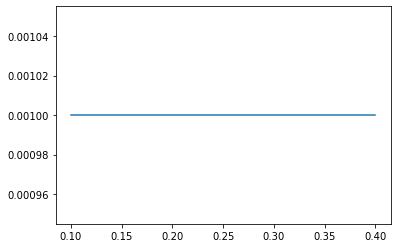

In [93]:
prior41.plot()

In [94]:
def update_mlb(pmf,data):
    k,n = data
    xs = pmf.qs
    likelihood = binom.pmf(k,n,xs)
    pmf *= likelihood
    pmf.normalize()

In [95]:
p41 = prior41.copy()

In [96]:
update_mlb(p41,(25,100))

<AxesSubplot:>

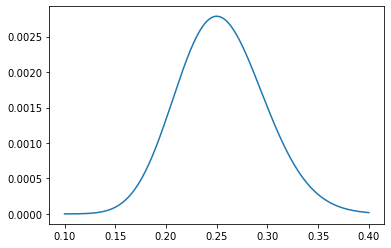

In [97]:
p41.plot()

In [73]:
p41.max_prob()

0.253

In [74]:
p41a = p41.copy()

In [75]:
update_mlb(p41a,(3,3))

<AxesSubplot:>

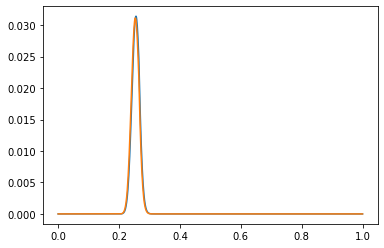

In [78]:
p41a.plot()
p41.plot()

In [79]:
(p41a.max_prob(),p41.max_prob())

(0.256, 0.253)

## Ex 4-3
Suppose you want to test whether a coin is fair, but you don't want to spin it hundreds of times. So you make a machine that spins the coin automatically and uses computer vision to determine the outcome.

However, you discover that the machine is not always accurate. Specifically, suppose the probability is y=0.2 that an actual heads is reported as tails, or actual tails reported as heads.

If we spin a coin 250 times and the machine reports 140 heads, what is the posterior distribution of x? What happens as you vary the value of y?'

In [98]:
def update_43(pmf,dataset,y):
    likelihood = {
        'H': (1-y)*hypos + y*(1-hypos),
        'T': y*hypos + (1-y) *(1-hypos)
    }
    for data in dataset:
        pmf *= likelihood[data]
    pmf.normalize()

In [114]:
hypos = np.linspace(0,1,101)
prior = Pmf(1,hypos)
dataset = 'H' * 140 + 'T' * 110
post00 = prior.copy()
post02 = prior.copy()
post05 = prior.copy()
update_43(post00,dataset,0.0)
update_43(post02,dataset,0.2)
update_43(post05,dataset,0.5)

<AxesSubplot:>

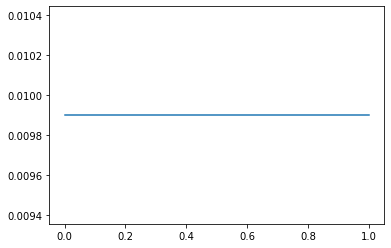

In [115]:
# post00.plot()
# post02.plot()
post05.plot()